# 2018-12-23 Four Filter Analysis (With Rotation)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from imaka.analysis import moffat as m
from imaka.analysis import fourfilt as f

stats_dir = '//g/lu/data/imaka/onaga/20181223/sta/reduce/stats/'
#stats_dir = '//Users/fatima/Desktop/Research/RUN9/20181223/sta/reduce/stats/'

dat_o_B = m.combine_table(stats_dir + 'stats_open_B.fits', plate_scale=0.06)
dat_o_V = m.combine_table(stats_dir + 'stats_open_V.fits', plate_scale=0.06)
dat_o_R = m.combine_table(stats_dir + 'stats_open_R.fits', plate_scale=0.06)
dat_o_I = m.combine_table(stats_dir + 'stats_open_I.fits', plate_scale=0.06)

dat_c_B = m.combine_table(stats_dir + 'stats_closed_B.fits', plate_scale=0.06)
dat_c_V = m.combine_table(stats_dir + 'stats_closed_V.fits', plate_scale=0.06)
dat_c_R = m.combine_table(stats_dir + 'stats_closed_R.fits', plate_scale=0.06)
dat_c_I = m.combine_table(stats_dir + 'stats_closed_I.fits', plate_scale=0.06)

f.assign_rot_20181223(dat_o_B)
f.assign_rot_20181223(dat_o_V)
f.assign_rot_20181223(dat_o_R)
f.assign_rot_20181223(dat_o_I)
f.assign_rot_20181223(dat_c_B)
f.assign_rot_20181223(dat_c_V)
f.assign_rot_20181223(dat_c_R)
f.assign_rot_20181223(dat_c_I)

table_list = [dat_o_B, dat_o_V, dat_o_R, dat_o_I,
              dat_c_B, dat_c_V, dat_c_R, dat_c_I]
opcl_list = ['open', 'open', 'open', 'open',
              'closed', 'closed', 'closed', 'closed']
filt_list = ['B', 'V', 'R', 'I',
             'B', 'V', 'R', 'I']

all_stats = f.stack_all(table_list, opcl_list, filt_list)

dat_set_o = [dat_o_B, dat_o_V, dat_o_R, dat_o_I]
dat_set_c = [dat_c_B, dat_c_V, dat_c_R, dat_c_I]
wvls = [445, 551, 658, 806]

dat_set_o_rot_1, dat_set_c_rot_1 = f.sort_rot(dat_set_o, dat_set_c, 1)
dat_set_o_rot_2, dat_set_c_rot_2 = f.sort_rot(dat_set_o, dat_set_c, 2)
dat_set_o_rot_3, dat_set_c_rot_3 = f.sort_rot(dat_set_o, dat_set_c, 3)
dat_set_o_rot_4, dat_set_c_rot_4 = f.sort_rot(dat_set_o, dat_set_c, 4)

In [38]:
print(all_stats.colnames)
all_stats['filter', 'pos_angle', 'file_num', 'loop_stat', 'wavelength']



['Image', 'Index', 'FILTER', 'BINFAC', 'DATE_UTC', 'TIME_UTC', 'DATE_HST', 'TIME_HST', 'FWHM', 'FWHM_std', 'EE25', 'EE50', 'EE80', 'NEA', 'NEA2', 'xFWHM', 'yFWHM', 'theta', 'emp_fwhm', 'emp_fwhm_std', 'quadrant', 'N Stars', 'N Sky', 'N Sky std', 'Amplitude', 'Amplitude std', 'Phi', 'Phi std', 'Beta', 'Beta std', 'Minor Alpha', 'Minor Alpha std', 'Major Alpha', 'Major Alpha std', 'FWHM_min', 'sig_FWHM_min', 'FWHM_maj', 'sig_FWHM_maj', 'pos_angle', 'file_num', 'loop_stat', 'filter', 'wavelength']


filter,pos_angle,file_num,loop_stat,wavelength
str1,float64,float64,str6,int64
B,1.0,30.0,open,445
B,1.0,31.0,open,445
B,1.0,32.0,open,445
B,1.0,34.0,open,445
B,1.0,36.0,open,445
B,1.0,38.0,open,445
B,1.0,40.0,open,445
B,1.0,42.0,open,445
B,1.0,44.0,open,445


# Data sliced by Time (each row is one orientation, time increasing downwards)

### Blue - open loop; Red - closed loop (first and third plot)
### Circles - Minor FWHM; Squares - Major FWHM (first and second plot)

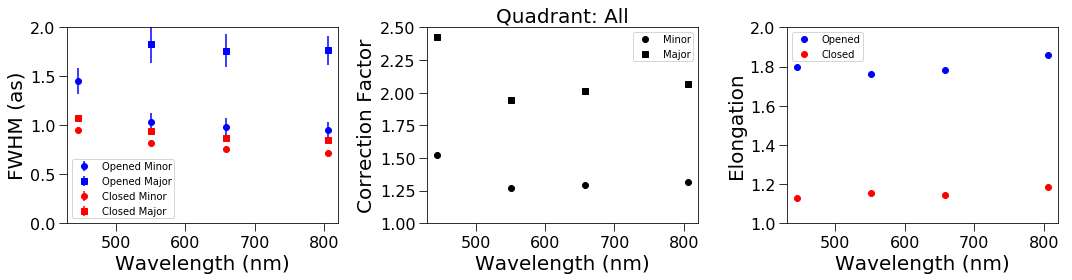

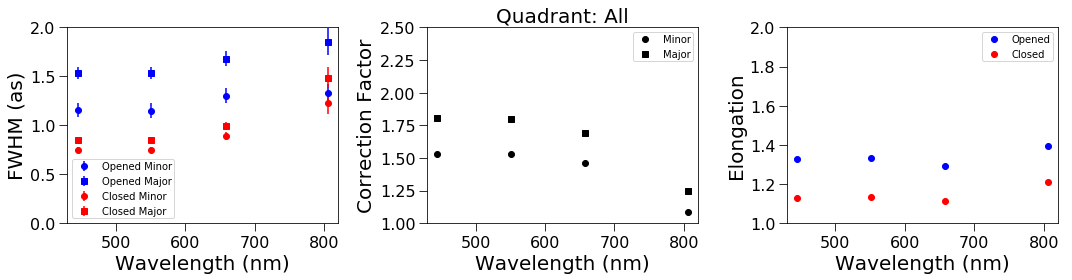

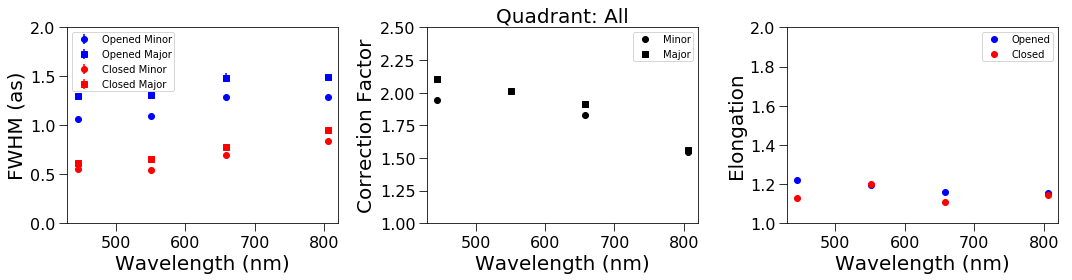

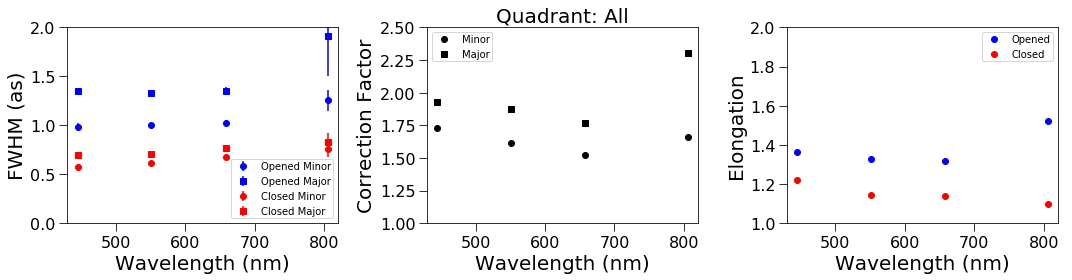

In [42]:
f.plot_set(dat_set_o_rot_1, dat_set_c_rot_1, quadrant=None, fig=1)
f.plot_set(dat_set_o_rot_2, dat_set_c_rot_2, quadrant=None, fig=2)
f.plot_set(dat_set_o_rot_3, dat_set_c_rot_3, quadrant=None, fig=3)
f.plot_set(dat_set_o_rot_4, dat_set_c_rot_4, quadrant=None, fig=4)

# Data sliced by quadrant

#### From top row to bottom row: all data together; NW corner; NE corner; SE corner; SW corner

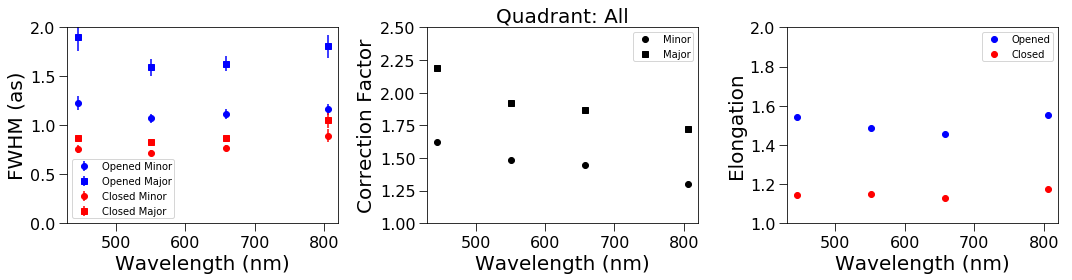

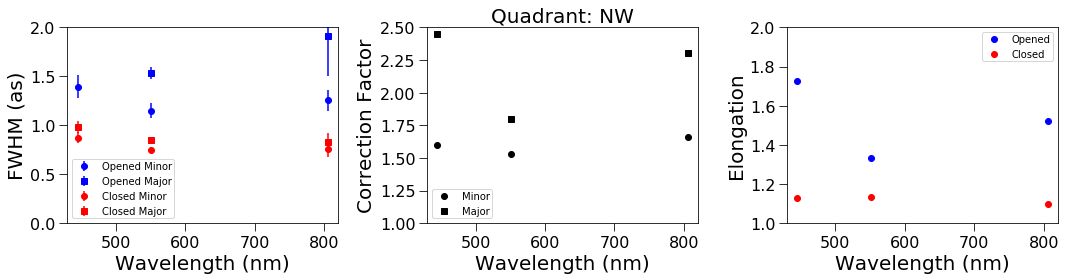

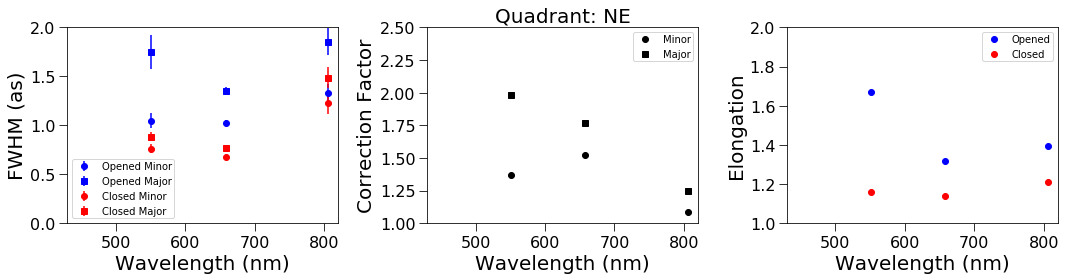

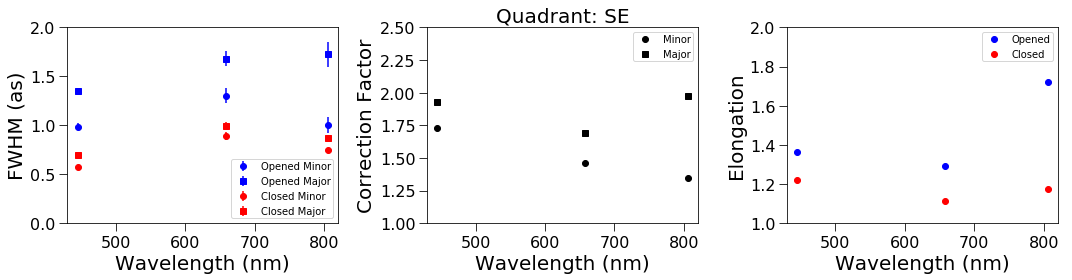

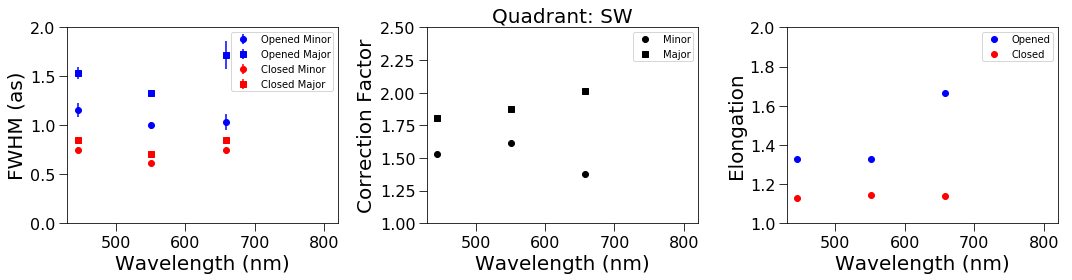

In [43]:
f.plot_set(dat_set_o,dat_set_c, quadrant=None, fig=1)
f.plot_set(dat_set_o, dat_set_c, quadrant='NW', fig=2)
f.plot_set(dat_set_o, dat_set_c, quadrant='NE', fig=3)
f.plot_set(dat_set_o, dat_set_c, quadrant='SE', fig=4)
f.plot_set(dat_set_o, dat_set_c, quadrant='SW', fig=5)

Text(0.5, 1.0, 'B=blue, V=green, R=orange, I=red')

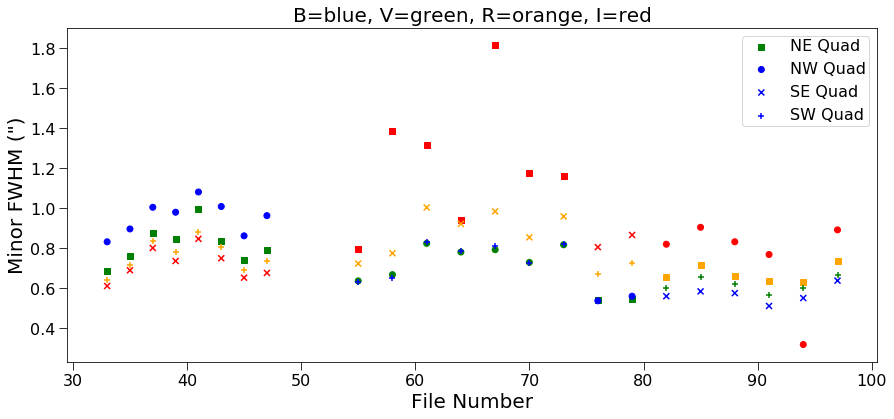

In [53]:
plt.figure(figsize=(15,6))
plt.clf()

colors = np.array(['somethinglong' for ii in range(len(all_stats))])
fdx1 = np.where(all_stats['filter'] == 'B')[0]
fdx2 = np.where(all_stats['filter'] == 'V')[0]
fdx3 = np.where(all_stats['filter'] == 'R')[0]
fdx4 = np.where(all_stats['filter'] == 'I')[0]

colors[fdx1] = 'blue'
colors[fdx2] = 'green'
colors[fdx3] = 'orange'
colors[fdx4] = 'red'

adx1 = np.where((all_stats['quadrant'] == 'NE') & (all_stats['loop_stat'] == 'closed'))[0]
adx2 = np.where((all_stats['quadrant'] == 'NW') & (all_stats['loop_stat'] == 'closed'))[0]
adx3 = np.where((all_stats['quadrant'] == 'SE') & (all_stats['loop_stat'] == 'closed'))[0]
adx4 = np.where((all_stats['quadrant'] == 'SW') & (all_stats['loop_stat'] == 'closed'))[0]

plt.scatter(all_stats['file_num'][adx1], all_stats['FWHM_min'][adx1], marker='s', c=colors[adx1].tolist(), label='NE Quad')
plt.scatter(all_stats['file_num'][adx2], all_stats['FWHM_min'][adx2], marker='o', c=colors[adx2].tolist(), label='NW Quad')
plt.scatter(all_stats['file_num'][adx3], all_stats['FWHM_min'][adx3], marker='x', c=colors[adx3].tolist(), label='SE Quad')
plt.scatter(all_stats['file_num'][adx4], all_stats['FWHM_min'][adx4], marker='+', c=colors[adx4].tolist(), label='SW Quad')
plt.legend()
plt.xlabel('File Number')
plt.ylabel('Minor FWHM (")')
plt.title('B=blue, V=green, R=orange, I=red')
